In [1]:
import os, sys 
from google.colab import drive 
drive.mount('/content/mnt') 
nb_path = '/content/notebooks' 
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path) 
sys.path.insert(0, nb_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/mnt


In [2]:
cd /content/mnt/My Drive/Colab Notebooks/devmatching

/content/mnt/My Drive/Colab Notebooks/devmatching


In [0]:
import pandas as pd
data = pd.read_csv("spam2.csv")

In [0]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']

In [5]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [0]:
train = data.iloc[0:5000]

In [7]:
train

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
4995,ham,Happy new year. Hope you are having a good sem...
4996,ham,Esplanade lor. Where else...
4997,ham,Can you talk with me..
4998,ham,"Hmph. Go head, big baller."


In [0]:
test = data.iloc[5000:-1]

In [9]:
test

,v1,v2
5000,ham,"Nope. Since ayo travelled, he has forgotten hi..."
5001,ham,You still around? Looking to pick up later
5002,spam,CDs 4u: Congratulations ur awarded Â£500 of CD...
5003,ham,There's someone here that has a year &lt;#&gt...
5004,ham,Guess which pub im in? Im as happy as a pig in...
...,...,...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."


In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [0]:
from nltk.tokenize import word_tokenize

In [15]:
from tqdm import tqdm
X_train = []

for i in tqdm(range(len(train['v2']))):
  token_words = word_tokenize(str(train['v2'].iloc[i]))
  temp_X = []
  for token_w in token_words:
    if (token_w not in stop_words) and (len(token_w) > 1):
      temp_X.append(token_w)
  X_train.append(temp_X)

100%|██████████| 5000/5000 [00:01<00:00, 3249.30it/s]


In [16]:
X_test = []

for i in tqdm(range(len(test['v2']))):
  token_words = word_tokenize(str(test['v2'].iloc[i]))
  temp_X = []
  for token_w in token_words:
    if (token_w not in stop_words) and (len(token_w) > 1):
      temp_X.append(token_w)
  X_test.append(temp_X)

100%|██████████| 571/571 [00:00<00:00, 3119.74it/s]


In [17]:
words = []
for i in tqdm(range(len(X_train))):
  for j in range(len(X_train[i])):
    words.append(X_train[i][j])
len(list(set(words)))

100%|██████████| 5000/5000 [00:00<00:00, 163991.18it/s]


11038

In [18]:
from keras.utils import np_utils
import numpy as np

y_train = []

for i in range(len(train['v1'])):
  if train['v1'].iloc[i] == 'ham':
    y_train.append([1, 0])
  elif train['v1'].iloc[i] == 'spam':
    y_train.append([0, 1])

y_train = np.array(y_train)

y_test = []

for i in range(len(test['v1'])):
  if test['v1'].iloc[i] == 'ham':
    y_test.append([1, 0])
  elif test['v1'].iloc[i] == 'spam':
    y_test.append([0, 1])

y_test = np.array(y_test)

Using TensorFlow backend.


In [0]:
from keras.preprocessing.text import Tokenizer
max_words = 11000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)
X_train_vec = tokenizer.texts_to_sequences(X_train)
X_test_vec = tokenizer.texts_to_sequences(X_test)

문자의 최대 길이 : 84
문자의 평균 길이 :  10.2332


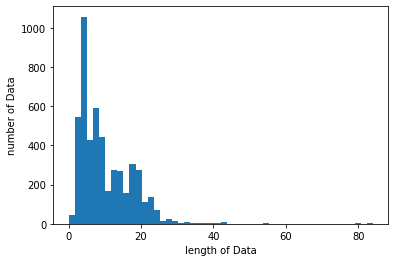

In [20]:
import matplotlib.pyplot as plt

print("문자의 최대 길이 :" , max(len(l) for l in X_train_vec))
print("문자의 평균 길이 : ", sum(map(len, X_train))/ len(X_train_vec))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [0]:
from keras.layers import Embedding, Dense, LSTM, Bidirectional, SimpleRNN
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [0]:
max_len = 84

X_train_vec = pad_sequences(X_train_vec, maxlen=max_len)
X_test_vec = pad_sequences(X_test_vec, maxlen=max_len)

In [23]:
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_vec, y_train, epochs=2, batch_size=32, validation_split=0.1)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 4500 samples, validate on 500 samples
Epoch 1/2





4500/4500 [==============================] - 21s 5ms/step - loss: 0.1884 - acc: 0.9389 - val_loss: 0.0718 - val_acc: 0.9800
Epoch 2/2
4500/4500 [==============================] - 19s 4ms/step - loss: 0.0261 - acc: 0.9936 - val_loss: 0.0579 - val_acc: 0.9860


In [0]:
eval = model.evaluate(X_test_vec, y_test)
print("acc : {}%".format(eval[1]))

571/571 [==============================] - 0s 834us/step
acc : 0.9868651488616462%


In [24]:
model2 = Sequential()
model2.add(Embedding(max_words, 100))
model2.add(LSTM(128))
model2.add(Dense(2, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train_vec, y_train, epochs=3, batch_size=32, validation_split=0.1)

Train on 4500 samples, validate on 500 samples
Epoch 1/3
4500/4500 [==============================] - 21s 5ms/step - loss: 0.1810 - acc: 0.9361 - val_loss: 0.0546 - val_acc: 0.9840
Epoch 2/3
4500/4500 [==============================] - 20s 4ms/step - loss: 0.0240 - acc: 0.9933 - val_loss: 0.0625 - val_acc: 0.9820
Epoch 3/3
4500/4500 [==============================] - 20s 4ms/step - loss: 0.0080 - acc: 0.9984 - val_loss: 0.0679 - val_acc: 0.9820


In [25]:
eval = model2.evaluate(X_test_vec, y_test)
print("acc : {}%".format(eval[1]))

571/571 [==============================] - 0s 749us/step
acc : 0.989492119089317%
